In [158]:
# nbi:hide_in
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import nbinteract as nbi
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, savefig
import sys 
sys.path.append('/home/nico/.local/lib/python3.8/site-packages')
from lcapy import Circuit


# <span style="color:blue"> Propagación de errores en un circuito eléctrico </span>
    
Ya vimos todas las herramientas necesarias para poder aplicar esto en las mediciones de circuitos. En esta sección vamos a realizar la propagación de errores en un circuito eléctrico paso pos paso.


## <span style="color:red">Propagación de errores en un circuito mixto. </span>

Imagínese que debemos obtener la corriente de cada uno de los componentes del circuito, pero que solo podemos medir el valor de las resistencias y sus diferencias de potencial. El circuito es el siguiente.

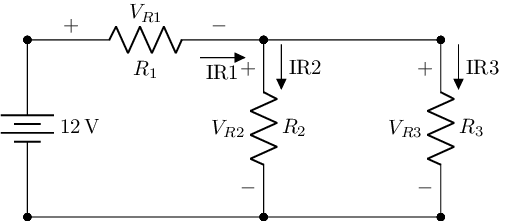

In [107]:
# nbi:hide_in
cct = Circuit() 
cct.add('BAT 1 0 ;down, l={12\,V}')
cct.add('R1 1 2;right=2, f_>=IR1, v=V_{R1}')
cct.add('R2 2 3  ; down=1.5, f>^=IR2,v=V_{R2}')
cct.add('W 2 4; right=1.5')
cct.add('W 5 3; left=1.5')
cct.add('W 3 0; left')
cct.add('R3 4 5  ; down=1.5, f>^=IR3, v=V_{R3}')
#cct.add('W 0 02; down=0.2, ground')
cct.draw(label_nodes=False,draw_nodes=True)

Vamos a establecer una tabla que nos indique los valores Nominales de las resistencias, su valor medido y el valor de las tensiones medidas.

<table class="egt">
  <tr>
    <th scope="row">R</th>
    <th>R nominal</th>
    <th>Ro</th>
    <th>Error absoluto de R</th>
    <th>Vo</th>
    <th>Error absoluto de V</th>
  </tr>
  <tr>
    <th>R1</th>
    <td>220 $\Omega$ </td>
    <td>215 $\Omega$</td>
    <td>--</td>
    <td>5,444 V</td>
    <td>0,042 V</td>  
  </tr>
  <tr>
    <th>R2</th>
    <td>470 $\Omega$</td>
    <td>473 $\Omega$</td>
    <td>--</td>
    <td>6,556 V</td>
    <td>0,076 V</td> 
  </tr>
  <tr>
    <th>R3</th>
    <td>560 $\Omega$</td>
    <td>572 $\Omega$</td>
    <td>--</td>
    <td>6,556 V</td>
    <td>0,076 V</td>  
  </tr>
</table>

<div class="alert alert-block alert-success">
Lo primero que debemos obtener son los $\Delta R$ y para ello haremos uso de la siguiente $\Delta R = |R_{nominal}- R_o|$
$$$$    
$$\Delta R_1 = |220 \Omega- 215\Omega|= 5 \Omega$$
$$$$    
$$\Delta R_2 = |470 \Omega- 473\Omega|= 3 \Omega$$ 
$$$$
$$\Delta R_3 = |560 \Omega- 572\Omega|= 12 \Omega$$
</div> 

Ya con estos datos podemos obtener los errores relativos tanto para las resistencias como para las tensiones, que es lo que necesitamos para calcular los errores de las corrientes.

<div class="alert alert-block alert-info">
Recuerden que la Ley de Ohm establece que $$\boxed{I = \frac{V}{R}}$$
</div>

<div class="alert alert-block alert-success">
Recordemos que los errores relativos se calculan con la fórmula $\epsilon = \frac{\Delta X}{X_o}$
$$$$    
$$\epsilon_{R1} = \frac{\Delta R_1}{R_{o1}}= \frac{5\Omega}{215\Omega}=0,02326$$
$$$$    
$$\epsilon_{R2} = \frac{\Delta R_2}{R_{o2}}= \frac{3\Omega}{473\Omega}=0,0006$$
$$$$
$$\epsilon_{R3} = \frac{\Delta R_3}{R_{o3}}= \frac{12\Omega}{572\Omega}=0,0210$$
$$$$
$$\epsilon_{V1} = \frac{\Delta V_1}{V_{o1}}= \frac{0,042 V}{5,444 V}=0,0077$$
$$$$
$$\epsilon_{V2} = \frac{\Delta V_2}{V_{o2}}= \frac{0,076 V}{6,557 V}=0,0116$$
$$$$
$$\epsilon_{V3} = \frac{\Delta V_3}{V_{o3}}= \frac{0,076 V}{6,557 V}=0,0116$$
</div> 

Ahora resta calcular las corrientes para cada caso y propagar los errores con los datos que tenemos.

<div class="alert alert-block alert-info">
Al tener que aplicar una división lo que tenemos que hacer es sumar los errores relativos del divisor y el dividendo. En nuestro caso:
$$$$    
$$\boxed{ \epsilon_{I} = \epsilon_{V} + \epsilon_{R}}$$  
</div>

<div class="alert alert-block alert-success"> 
$$ I_{o1} = \frac{V_{o1}}{R_{o1}}= \frac{5,444 V}{215\Omega}=25,321mA$$
$$$$    
$$ I_{o2} = \frac{V_{o2}}{R_{o2}}= \frac{6,557 V}{473\Omega}=13,863mA$$
$$$$
$$ I_{o3} = \frac{V_{o3}}{R_{o3}}= \frac{6,557 V}{572\Omega}=11,463mA$$
$$$$
$$\epsilon_{I1} = \epsilon_{V1} + \epsilon_{R1}= 0,0077 + 0,0233 = 0,0310$$
$$$$
$$\epsilon_{I2} = \epsilon_{V2} + \epsilon_{R2}= 0,0116 + 0,0006 = 0,0122$$
$$$$
$$\epsilon_{I3} = \epsilon_{V3} + \epsilon_{R3}= 0,0116 + 0,0210 = 0,0326$$
</div> 

Ahora tenemos que obtener el valor de los errores absolutos y presentar las medidas de forma correcta.

<div class="alert alert-block alert-info">
$$\boxed{ \Delta_{I} = \epsilon_{I} * I_o}$$  
</div>

<div class="alert alert-block alert-success"> 
$$ \Delta_{I1} = \epsilon_{I1} * I_{o1} = 0,031 * 25,321mA = 0,785mA$$
$$$$    
$$ \Delta_{I2} = \epsilon_{I2} * I_{o2} = 0,0122 * 13,863mA = 0,169mA$$
$$$$
$$ \Delta_{I3} = \epsilon_{I3} * I_{o3} = 0,0326 * 11,463mA = 0,374mA$$
</div> 

Finalmente presentaremos los resultados con dos  cifras significativas

<div class="alert alert-block alert-info">
$$ I_1 = I_{o1} \pm \Delta_{I1} = 25,321mA \pm 0,785mA $$ 
$$$$
$$ \boxed{  I_1 = 25,32mA \pm 0,76 mA}$$   
$$$$
$$ I_2 = I_{o2} \pm \Delta_{I2} = 13,863mA \pm 0,169mA $$ 
$$$$
$$ \boxed{  I_2 = 13,86mA \pm 0,17 mA}$$    
$$$$
$$ I_2 = I_{o2} \pm \Delta_{I2} = 11,463mA \pm 0,374mA $$ 
$$$$
$$ \boxed{  I_2 = 11,46mA \pm 0,37 mA}$$      
</div>

En la aplicación siguiente realice un algoritmo que resuelve el ejemplo que acabamos de realizar permitiéndole modificar los valores de las resistencias y la tolerancia de las mismas. Los valores de los errores absolutos de tensión los tomo de las hojas de datos de un multímetro. Estudiaremos como obtenerlos en el capítulo siguiente.

**Antes de comenzar no olvide presionar el botón <span style="color:red">Show Widgets</span> para poder ver la animación** 

In [160]:
# nbi:hide_in
#from lcapy import R

R1 = widgets.IntSlider(min=1, max=1e4, step=1,value=220,)
R2 = widgets.IntSlider(min=1, max=1e4, step=1,value=470,)
R3 = widgets.IntSlider(min=1, max=1e4, step=1,value=560,)

tol = widgets.SelectMultiple(
    options={'0%':0.0, '0.05%':0.005, '0.1%':0.001, '0.25%':0.0025, '0.5%':0.005, 
             '1%':0.01, '2%':0.02, '5%':0.05, '10%':0.1, '20%':0.2},
    value=[0],
    #rows=10,
    description='Tolerancia de la resisitencia',
    disabled=False
)

def response(R1,R2,R3,tol):
    
    Ro1 = R1
    Ro2 = R2
    Ro3 = R3
    
    tol = tol[0]
    tol1 = (np.random.uniform(low=-tol, high=tol, size=1)).item(0) 
    tol2 = (np.random.uniform(low=-tol, high=tol, size=1)).item(0)
    tol3 = (np.random.uniform(low=-tol, high=tol, size=1)).item(0)
    #tol = (np.random.normal(0, np.sqrt(tol), size=1)).item(0) 
   
    R1 = (1 + tol1) * R1 
    R2 = (1 + tol2) * R2
    R3 = (1 + tol3) * R3
    
    cct = Circuit() 
    cct.add('BAT 1 0 ;down, l={12\,V}')
    cct.add('R1 1 2  {R1};right=2'.format(R1=R1))
    cct.add('R2 2 3  {R2}; down=1.5'.format(R2=R2))
    cct.add('W 2 4; right=1.5')
    cct.add('W 5 3; left=1.5')
    cct.add('W 3 0; left')
    cct.add('R3 4 5  {R3}; down=1.5'.format(R3=R3))
    #cct.add('W 0 02; down=0.2, ground')
    cct.draw(label_nodes=False,draw_nodes=True)
    
    #RT = R('R1') + (R('R2') | R('R3'))
    #RT = RT.simplify()
    #print("Esta es la fórmula para el cálculo de RT: ",RT)
    RT = R1 + R2*R3/(R2 + R3)
    print("El valor de RT es: {:.4f} \u03A9".format(RT))
    print("")
    
    V = 12
    
    I1 = V/RT
    V1 = R1* I1
    V2 = V - V1
    V3 = V2
    
    print("El valor de V1 es: {:.4f} V".format(V1))
    print("El valor de V2 es: {:.4f} V".format(V2))
    print("El valor de V3 es: {:.4f} V".format(V3))
    print("")
    
    ea_V1 = V1*0.007 + 3e-3
    ea_V2 = V2*0.007 + 30e-3
    ea_V3 = V3*0.007 + 30e-3
    
    print("El error absoluto de V1 es: {:.4f} V".format(ea_V1))
    print("El error absoluto de V2 es: {:.4f} V".format(ea_V2))
    print("El error absoluto de V3 es: {:.4f} V".format(ea_V3))
    print("")
        
    er_V1 = ea_V1 / V1
    er_V2 = ea_V1 / V2
    er_V3 = ea_V1 / V3
    
    print("El error relativo de V1 es: {:.4f} ".format(er_V1))
    print("El error relativo de V2 es: {:.4f} ".format(er_V2))
    print("El error relativo de V3 es: {:.4f} ".format(er_V3))
    print("")
    
    ea_R1 = np.abs(Ro1 - R1)
    ea_R2 = np.abs(Ro2 - R2)
    ea_R3 = np.abs(Ro3 - R3)
    
    print("El error absoluto de R1 es: {:.4f} \u03A9".format(ea_R1))
    print("El error absoluto de R2 es: {:.4f} \u03A9".format(ea_R2))
    print("El error absoluto de R3 es: {:.4f} \u03A9".format(ea_R3))
    print("")
    
    er_R1 = ea_R1 / R1
    er_R2 = ea_R1 / R2
    er_R3 = ea_R1 / R3
    
    print("El error relativo de R1 es: {:.4f} ".format(er_R1))
    print("El error relativo de R2 es: {:.4f} ".format(er_R2))
    print("El error relativo de R3 es: {:.4f} ".format(er_R3))
    print("")
    
    er_I1 = er_V1 + er_R1
    er_I2 = er_V2 + er_R2
    er_I3 = er_V3 + er_R3
    
    print("El error relativo de I1 es: {:.4f} ".format(er_I1))
    print("El error relativo de I2 es: {:.4f} ".format(er_I2))
    print("El error relativo de I3 es: {:.4f} ".format(er_I3))
    print("")
    
    ea_I1 = I1*er_I1
    ea_I2 = I1*er_I2
    ea_I3 = I1*er_I3
    
    print("El error absoluto de I1 es: {:.4f} A".format(ea_I1))
    print("El error absoluto de I2 es: {:.4f} A".format(ea_I2))
    print("El error absoluto de I3 es: {:.4f} A".format(ea_I3))
    print("")
    
    I2 = V2 / R2
    I3 = V3 / R3
    
    print("El valor de I1 es: {:.4E} A".format(I1))
    print("El valor de I2 es: {:.4E} A".format(I2))
    print("El valor de I3 es: {:.4E} A".format(I3))
    print("")
    
    print("Los resultados son los siguientes:")
    print("I1 ={:.4E}A +/- {:.4E}A ".format(I1,ea_I1))
    print("I2 ={:.4E}A +/- {:.4E}A ".format(I2,ea_I2))
    print("I3 ={:.4E}A +/- {:.4E}A ".format(I3,ea_I3))


interact(response, R1=R1,R2=R2,R3=R3, tol=tol);

interactive(children=(IntSlider(value=220, description='R1', max=10000, min=1), IntSlider(value=470, descripti…

Le queda como ejercicio al lector expresar la medida de forma correcta.

<form method="get" action="https://nicolasferragamo.github.io/AEA/index.html">
 <button type="submit">Inicio
</form>
<form method="get" action="https://nicolasferragamo.github.io/AEA/Mediciones/Propagacion-de-errores.html">
 <button type="submit">Anterior
</form> 
<form method="get" action="https://nicolasferragamo.github.io/AEA/Mediciones/https://nicolasferragamo.github.io/AEA/Mediciones/Anexo1.html">
 <button type="submit">Siguiente
</form> 

**Copyright**

The notebook is provided as [Open Educational Resource]('https://en.wikipedia.org/wiki/Open_educational_resources'). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0]('https://creativecommons.org/licenses/by/4.0/'), the code of the IPython examples under the [MIT license]('https://opensource.org/licenses/MIT'). Please attribute the work as follows: Aplicaciones de electrónica Analógica by Nicolás Ferragamo.